<a href="https://colab.research.google.com/github/tleyden/FruitPunch_AI_Bootcamp/blob/main/FruitPunch_Capstone_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pip installs

In [1]:
!apt install -y jq
!pip install pycocotools
!python -m pip install pyyaml==5.1
!pip install wandb -qU


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 2s (175 kB/s)
Selecting previously unselected package libonig4:amd64.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../libo

## Imports

In [2]:
import os
from matplotlib import pyplot as plt
import cv2

from pycocotools.coco import COCO
import skimage.io as io
from pathlib import Path

import sys, distutils.core
from google.colab.patches import cv2_imshow


## Download zips from google bucket

In [8]:
from google.colab import auth
auth.authenticate_user()

In [9]:
if not os.path.exists("Labeled data-20211126T095740Z-001.zip"):
    !gsutil cp "gs://fruitpunch-ai-tleyden/Labeled data-20211126T095740Z-001.zip" .
if not os.path.exists("Labeled data-20211126T095740Z-002.zip"):
    !gsutil cp "gs://fruitpunch-ai-tleyden/Labeled data-20211126T095740Z-002.zip" .


Copying gs://fruitpunch-ai-tleyden/Labeled data-20211126T095740Z-001.zip...
\ [1 files][  2.0 GiB/  2.0 GiB]   59.5 MiB/s                                   
Operation completed over 1 objects/2.0 GiB.                                      
Copying gs://fruitpunch-ai-tleyden/Labeled data-20211126T095740Z-002.zip...
\ [1 files][809.6 MiB/809.6 MiB]   55.3 MiB/s                                   
Operation completed over 1 objects/809.6 MiB.                                    


In [10]:
if not os.path.exists("labeled_data"):
    !unzip -q "Labeled data-20211126T095740Z-001.zip"
    !unzip -q "Labeled data-20211126T095740Z-002.zip"

## Re-arrange directories to match expected structure

In [11]:
if not os.path.exists("labeled_data"):
    !mv "Labeled data" labeled_data
if not os.path.exists("labeled_data/images/test"):
    !mkdir labeled_data/images/test 
    !mv labeled_data/images/*.PNG labeled_data/images/test 

## Set path variables

In [12]:
DATA_PATH = '/content/labeled_data/'
IMAGES_PATH = DATA_PATH + 'images/'
LABELS_PATH = DATA_PATH + 'annotations/'

# Get paths to IMAGE directories
TRAIN_IMAGES_PATH = IMAGES_PATH + 'train/'
TEST_IMAGES_PATH = IMAGES_PATH + 'test/'
VAL_IMAGES_PATH = IMAGES_PATH + 'val/'

TRAIN_LABELS = LABELS_PATH + 'instances_train.json'
TEST_LABELS = LABELS_PATH + 'instances_test_dataset.json'
VAL_LABELS = LABELS_PATH + 'instances_val.json'

## Step 1 - analyze the data

### View training images

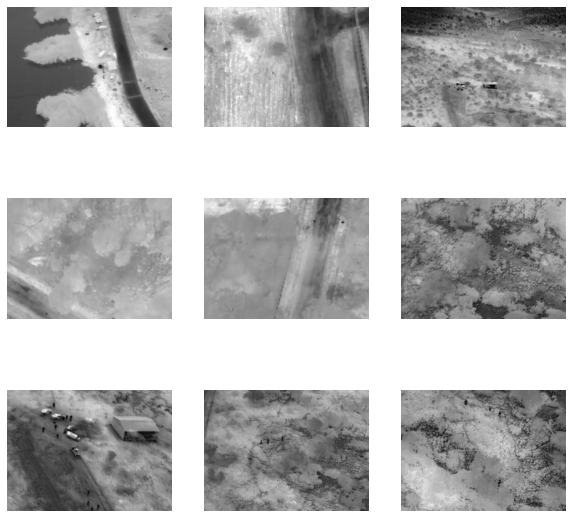

In [13]:
# View some train images
plt.figure(figsize=(10, 10))
TRAIN_IMAGES = os.listdir(TRAIN_IMAGES_PATH)
for i in range(9):
  img_path = TRAIN_IMAGES_PATH + TRAIN_IMAGES[i]
  ax = plt.subplot(3, 3, i + 1)
  img = cv2.imread(img_path, )
  plt.imshow(img, cmap='gray')
  plt.axis("off")

### Visualise images and annotations

In [14]:
# Analyse training annotations
coco = COCO(TRAIN_LABELS) # return dictionary of the dataset
img_IDs = coco.getImgIds() # get image IDs
imgs = coco.loadImgs(img_IDs[1100:1103]) # load images

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


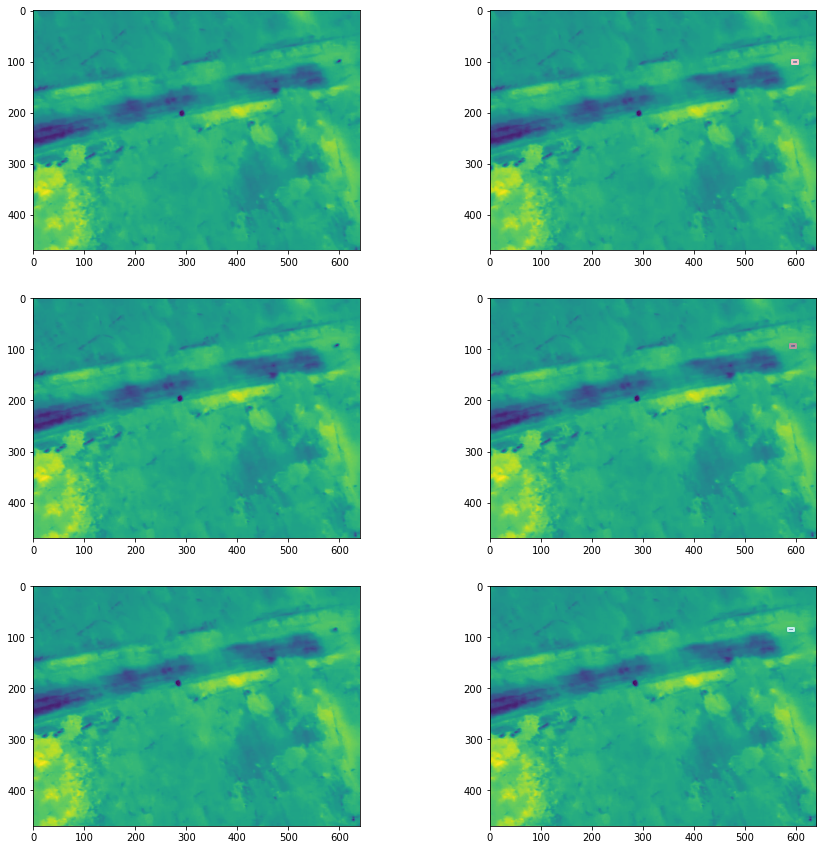

In [15]:

# Visualise images and annotations
_, axs = plt.subplots(len(imgs), 2, figsize=(15, 15))
for img, ax in zip(imgs, axs):
    I = io.imread(Path(TRAIN_IMAGES_PATH)/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)